In [22]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
import cv2

In [24]:
img = cv2.imread('./test/img.jpg')
img.shape

(552, 828, 3)

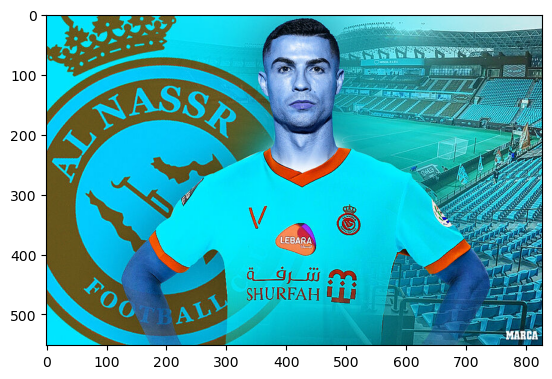

In [25]:
plt.imshow(img)

In [26]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(552, 828)

In [27]:
gray

array([[211, 211, 211, ..., 228, 228, 228],
       [211, 211, 211, ..., 228, 228, 228],
       [211, 211, 211, ..., 228, 228, 228],
       ...,
       [209, 209, 209, ...,  69,  71,  72],
       [209, 209, 209, ...,  71,  73,  74],
       [209, 209, 209, ...,  73,  75,  76]], dtype=uint8)

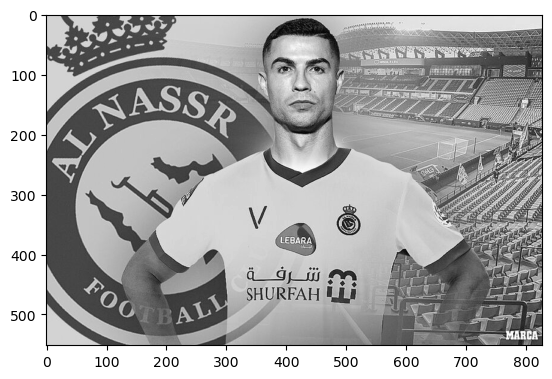

In [28]:
plt.imshow(gray,cmap='gray')

In [29]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [30]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [31]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

In [32]:
cv2.imshow('Detected Faces', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

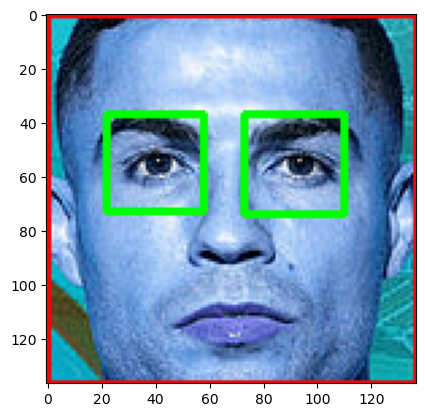

In [33]:
plt.imshow(roi_color,cmap='gray')

In [34]:
def cropped_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print('Failed to load image',image_path)
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

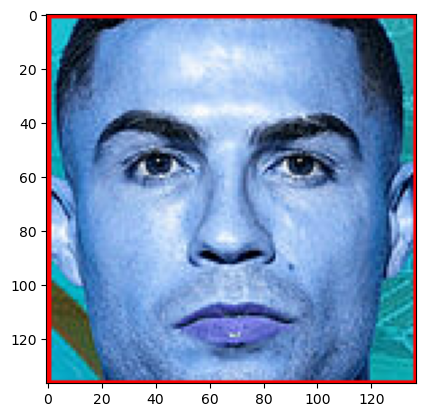

In [35]:
img_cp = cropped_image('./test/img.jpg')
plt.imshow(img_cp)

In [36]:
# path_data = "./dataset/"
# cr_data = "./dataset/crop/"

In [37]:
import os

In [38]:
# img_dir = []
# for entry in os.scandir(path_data):
#     if entry.is_dir():
#         img_dir.append(entry.path)

In [39]:
# img_dir

['./dataset/crop',
 './dataset/Kane Williamson',
 './dataset/Kobe Bryant',
 './dataset/lionel messi',
 './dataset/Maria Sharapova',
 './dataset/Ronaldo']

In [40]:
import shutil

In [41]:
# if os.path.exists(cr_data):
#     shutil.rmtree(cr_data)
# os.mkdir(cr_data)

In [42]:
# cropped_dir = []
# celebrity_dict = {}

# for img_dir in img_dir:  # Assuming img_dir is a list of directories
#     count = 1
#     celebrity_name = img_dir.split('/')[-1]
#     print(celebrity_name)

#     celebrity_dict[celebrity_name] = []
    
#     for entry in os.scandir(img_dir):
#         if entry.is_file():  # Check if the entry is a file
#             roi_color = cropped_image(entry.path)
#             if roi_color is not None:
#                 cropped_folder = os.path.join(cr_data, celebrity_name)
#                 if not os.path.exists(cropped_folder):
#                     os.makedirs(cropped_folder)
#                     cropped_dir.append(cropped_folder)
#                     print('Cropped images folder:', cropped_folder)
                    
#                 cropped_file_name = celebrity_name + str(count) + ".png"
#                 cropped_file_path = cropped_folder + "/" + cropped_file_name
                
#                 cv2.imwrite(cropped_file_path,roi_color)
#                 celebrity_dict[celebrity_name].append(cropped_file_path)
#                 count += 1

crop
Kane Williamson
Cropped images folder: ./dataset/crop/Kane Williamson
Kobe Bryant
Cropped images folder: ./dataset/crop/Kobe Bryant
lionel messi
Cropped images folder: ./dataset/crop/lionel messi
Maria Sharapova
Cropped images folder: ./dataset/crop/Maria Sharapova
Ronaldo
Cropped images folder: ./dataset/crop/Ronaldo


In [43]:
import pywt

In [44]:
def w2d(img, mode='haar', level=1):
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    imArray = np.float32(imArray) 
    imArray /= 255

    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0  

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

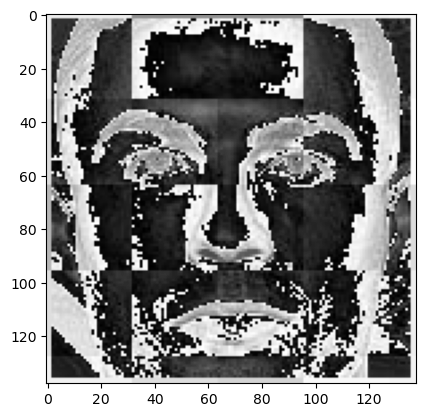

In [45]:
im_har = w2d(img_cp, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [55]:
celebrity_dict

{'crop': [],
 'Kane Williamson': ['./dataset/crop/Kane Williamson/Kane Williamson1.png',
  './dataset/crop/Kane Williamson/Kane Williamson2.png',
  './dataset/crop/Kane Williamson/Kane Williamson3.png',
  './dataset/crop/Kane Williamson/Kane Williamson4.png',
  './dataset/crop/Kane Williamson/Kane Williamson5.png',
  './dataset/crop/Kane Williamson/Kane Williamson6.png',
  './dataset/crop/Kane Williamson/Kane Williamson7.png',
  './dataset/crop/Kane Williamson/Kane Williamson8.png',
  './dataset/crop/Kane Williamson/Kane Williamson9.png',
  './dataset/crop/Kane Williamson/Kane Williamson10.png',
  './dataset/crop/Kane Williamson/Kane Williamson11.png'],
 'Kobe Bryant': ['./dataset/crop/Kobe Bryant/Kobe Bryant1.png',
  './dataset/crop/Kobe Bryant/Kobe Bryant2.png',
  './dataset/crop/Kobe Bryant/Kobe Bryant3.png',
  './dataset/crop/Kobe Bryant/Kobe Bryant4.png',
  './dataset/crop/Kobe Bryant/Kobe Bryant5.png',
  './dataset/crop/Kobe Bryant/Kobe Bryant6.png',
  './dataset/crop/Kobe Bryant

In [56]:
celebrity_dict = {}
for img_dir in cropped_dir:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        celebrity_dict[celebrity_name] = file_list
celebrity_dict

{'Kane Williamson': ['./dataset/crop/Kane Williamson\\Kane Williamson1.png',
  './dataset/crop/Kane Williamson\\Kane Williamson10.png',
  './dataset/crop/Kane Williamson\\Kane Williamson2.png',
  './dataset/crop/Kane Williamson\\Kane Williamson3.png',
  './dataset/crop/Kane Williamson\\Kane Williamson4.png',
  './dataset/crop/Kane Williamson\\Kane Williamson5.png',
  './dataset/crop/Kane Williamson\\Kane Williamson9.png'],
 'Kobe Bryant': ['./dataset/crop/Kobe Bryant\\Kobe Bryant1.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant11.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant13.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant14.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant16.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant17.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant18.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant3.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant4.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant5.png',
  './dataset/crop/Kobe Bryant\\Kobe Bryant7.png',
  

In [57]:
class_dict = {}
count = 0
for celebrity_name in celebrity_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict    

{'Kane Williamson': 0,
 'Kobe Bryant': 1,
 'lionel messi': 2,
 'Maria Sharapova': 3,
 'Ronaldo': 4}

In [58]:
x = []
y = []
for celebrity_name, training_files in celebrity_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        saclled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        saclled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((saclled_raw_img.reshape(32*32*3,1),saclled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [59]:
len(x)

158

In [60]:
len(x[0])

4096

In [61]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(158, 4096)

In [62]:
x[0]

array([255.,   0.,   0., ..., 238., 238., 238.])

In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [73]:
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(kernel='rbf', C=10))
])

In [74]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [75]:
score = pipe.score(x_test, y_test)
score

0.8

In [76]:
len(x_test)

40

In [77]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.33      0.50         3
           2       0.89      0.80      0.84        10
           3       1.00      0.67      0.80         6
           4       0.73      1.00      0.84        19

    accuracy                           0.80        40
   macro avg       0.72      0.56      0.60        40
weighted avg       0.79      0.80      0.77        40



C:\ANACONDA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ANACONDA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ANACONDA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from collections import Counter

print("Training set class distribution:", Counter(y_train))
print("Test set class distribution:", Counter(y_test))

Training set class distribution: Counter({4: 56, 2: 31, 3: 16, 1: 10, 0: 5})
Test set class distribution: Counter({4: 19, 2: 10, 3: 6, 1: 3, 0: 2})


In [80]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [ ]:
# validation score 

In [83]:
scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.747101,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.593116,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.678986,{'logisticregression__C': 1}


In [84]:
best_estimators['svm'].score(x_test,y_test)

0.875

In [85]:
best_estimators['random_forest'].score(x_test,y_test)

0.625

In [86]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8

In [87]:
best_clf = best_estimators['svm']

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 1,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  1],
       [ 0,  0,  8,  0,  2],
       [ 0,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 19]], dtype=int64)

In [92]:
import joblib

In [93]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [95]:
import json

In [97]:
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))